In [56]:
import pandas as pd
import numpy as np 
import matplotlib as mlt
import matplotlib.pyplot as plt  

In [57]:
music = pd.read_csv("Desktop\Project\spotify.csv")

In [58]:
music.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [59]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [60]:
numeric_col = ['popularity','duration_ms','danceability','energy','loudness','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
categorical_col = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']

In [62]:
numeric_col = ['popularity','duration_ms','danceability','energy','loudness','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
music.boxplot(numeric_col)

AssertionError: 2

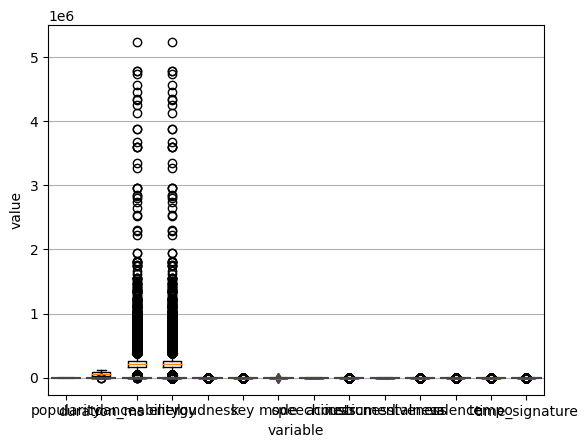

In [63]:
music = pd.DataFrame(data = np.random.random(size=(5,14)), columns = ['popularity','duration_ms','danceability','energy','loudness','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature'])

sns.boxplot(x="variable", y="value", data=pd.melt(music))

plt.show()

In [64]:
df = pd.DataFrame(data = np.random.random(size=(4,14)), columns = ['popularity','duration_ms','danceability','energy','loudness','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature'])
df.boxplot(numeric_col)

<AxesSubplot:>

In [65]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [66]:
# scale data first
X = StandardScaler().fit_transform(music[numeric_col].values)

music = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = music.labels_

In [67]:
pd.Series(labels).value_counts()

-1    5
dtype: int64

In [72]:
plt.figure(figsize=(4,14))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
    
plt.xlabel('Standardized Number of Rooms');
plt.ylabel('Standardized Price');